# Prediction of Heart stroke
## Phase 2: Predictive modeling

#### Group Name: Group 14

#### Name(s) & ID(s) of Group Members: 
- **Aarthi Vijayakumar(s3958151)**
- **Krishnakanth Srikanth(s3959200)**
- **Antony Rosario John Peter (s3940203)**

## Table of Contents
* [Introduction](#intro) 
  + [Phase 1 Summary](#phase1-summary)
  + [Report Overview](#report-overview)
  + [Overview of Methodology](#methodology-overview)
* [Predictive Modeling](#predictive-modeling)
  + [Feature Selection (FS)](#FS)
  + [Random Forest Classifier](#rfc)
      + [Model Fitting & Tuning](#rfc-fitting-tuning)
  + [Gaussian Naive Bayes](#gnb)
      + [Model Fitting & Tuning](#gnb-fitting-tuning)
  + [Support Vector Machine](#svm)
      + [Model Fitting & Tuning](#svm-fitting-tuning)
  + [K-Nearest Neighbor Classifier](#knn)
      + [Model Fitting & Tuning](#knn-fitting-tuning)
  + [Decision Tree Classifier](#dt)
      + [Model Fitting & Tuning](#dt-fitting-tuning)
  + [Neural Network Model](#NN)
      + [Model Fitting & Tuning](#NN-fitting-tuning)
  + [Model Comparison](#model-comparison)
* [Critique & Limitations](#limitations)
* [Summary & Conclusions](#Summary-and-Conclusion)
   + [Project Summary](#project-summary)
   + [Summary of Findings](#summary-findings)
   + [Conclusions](#conclusions)
* [References](#References)

## Introduction <a id='intro'></a>

### Phase 1 Summary <a id='phase1-summary'></a>

As part of phase 1, We had taken a public dataset about heart disease, which had clinical features and risk factors of various patients that contributed to causing a heart problem in a person. The dataset had a total of 16 features and 4238 observations. As part of data preprocessing, we have made type conversions for the features 'cigsPerDay', and 'BPMeds'. We also imputed values for the columns 'education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', and 'glucose' which had missing values. Once the data has been pre-processed, we explored the data by visualizing them as uni-variate, bi-variate and multi-variate combinations which helped us to understand how the features were correlated. The preprocessed data from the phase 1 will be used in this analysis to attain our primary objective of classifying the target variable **'Heart_stroke'** based on the remaining descriptive features.

### Report Overview <a id='report-overview'></a>

This project is a continuation of phase 1 report and as part of this we have tried to predict the probability an individual is affected by Heart stroke by using the given descriptive features. In this, we have performed **One-Hot encoding** on all the categorical features . The data, for a Machine Learning model has to be in same scale, because of which we have scaled the data using **MinMaxScaler()** so that the ML model interprets the features on the same scale. After scaling the features, we split the data into training and testing sets using **train_test_split** in **80:20** ratio.

Once after we split the data into test and train sets, we perform **Feature Selection** using **Random Forest Importance** and select the top 10 features that helps us to answer our problem. We also plot the top 10 features obtained from RFI using bar plot. We also create a custom function for this feature selection to use it in our algorithms as a step in the pipeline. we will be using 5 classification algorithms which will be explained further in the following sections to achieve our project's goal.

We also have created models using **Neural Network** and tuned the parameters for the same and interpreted the results obtained. 

Furthermore, the created classification models are compared using **Paired t-test** to find out which model is statistically significant. Along with this, we calculate the accuracy and other performance evaluation metrics and classification reports from which we come to a conclusion saying which model performs the best to our problem. 

Finally, the summary of this project along with its findings and limitations are listed out.

### Overview of Methodology <a id='methodology-overview'></a>

As part of this phase 2 analysis, to predict the target feature we have performed the predictive modeling using the below classifier algorithms.

1. Random Forest Classifier 
2. Gaussian Naive Bayes 
3. Support Vector Machine  
4. K-Nearest Neighbor Classifier
5. Decision Tree Classifier
        
As part of our modeling process, initially, we completed the transformation of the data obtained from our phase 1. This includes transforming the categorical features into numerical features with the help of one-hot encoding and also scaling all the other descriptive features in the data. After this, we split the data into training and test set in a ratio of **80:20**. This way our total data with **4136 observations** from phase 1 has been split into **3308 rows of training set** and **828 rows of test set**.  

Before performing predictive modeling based on a particular classifier on the training dataset, we select the best features using the powerful **Random Forest Importance method** inside a pipeline. Based on this approach, we select the best 10 features to perform the modeling on all the 5 classifiers. This feature selection along with the hyper-parameters are created as a single pipeline, on which we perform **5-fold stratified cross-validation** to fine tune the parameters for each individual classifiers based on **accuracy** as the performance metric. As our target feature 'Heart_stroke' has more number of people who did not experience it (i.e.,) it has more number of negative class samples, hence **unbalanced**. To mitigate this, stratification has been crucial to ensure that each of our validation set has the same ratio of classes similar to the original dataset. We also evaluated the sensitivity of each model based on the hyper-parameters used.

Tuned classifiers are created with the help of **GridSearchCV and RandomizedSearchCV** by identifying the best set of hyper parameters for each classifiers based on our training data. This way we obtained 5 different tuned classifiers for each algorithm. After this, the classifiers are fit into our test data by implementing **10-fold cross validation**, on which we performed the **paired t-test** to evaluate if the difference in the performance of these classifiers are statistically significant. Along with the accuracy score we also evaluate the model based on their area under curve(AUC) and precision, recall, F1-score that are derived from their confusion matrix and classification report.

We also performed **Neural Network analysis** on our data and evaluated the performance of the model by tuning the parameters which has been detailed out in the later part of this report.

## Predictive Modeling <a id='predictive-modeling'></a>

The main objective of this project is to fit and compare five different classification models to predict the probability an individual is affected by Heart stroke using the given descriptive features and their influence for the same using the data sourced from the Kaggle (Mirza_Hasnine, 2023). The descriptive features include 12 numeric and 3 categorical features. The target feature has two classes defined as "Yes" and "No" respectively.

In [1]:
# Importing libraries
import warnings
warnings.filterwarnings("ignore") # To ignore warnings
import pandas as pd
pd.set_option('display.max_columns', None) # Display all columns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")
import seaborn as sns
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PowerTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import keras
import tensorflow as tf

In [2]:
# Importing dataset
phase2 = pd.read_csv('Phase2_Group14.csv')

In [3]:
# Sampling the dataset to display 10 rows 
phase2.sample(n=10,random_state=25)

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_stroke
1009,Male,63,uneducated,1,10,0,no,0,0,271.0,131.0,73.5,30.12,72.0,107.000000,yes
387,Female,47,primaryschool,1,3,0,no,0,0,155.0,122.5,77.5,21.34,65.0,78.000000,No
2679,Female,64,uneducated,0,0,0,no,0,0,305.0,126.5,67.0,25.77,67.0,66.000000,yes
1247,Male,45,uneducated,0,0,0,no,1,0,218.0,128.0,90.0,32.15,80.0,77.000000,No
122,Male,41,primaryschool,0,0,0,no,0,0,223.0,112.5,80.0,29.44,75.0,58.000000,No
3071,Female,50,graduate,0,0,0,no,1,0,305.0,151.0,106.5,25.38,100.0,75.000000,No
967,Female,40,uneducated,0,0,0,no,0,0,340.0,149.0,81.0,28.46,110.0,99.000000,No
252,Female,60,uneducated,0,0,0,no,1,0,352.0,197.5,105.0,36.29,75.0,95.000000,yes
4069,Female,41,primaryschool,1,5,0,no,0,0,205.0,105.0,74.0,20.85,87.0,81.903698,No
2132,Male,44,primaryschool,1,30,0,no,0,0,339.0,97.0,62.0,22.19,90.0,85.000000,No


In [4]:
# Check unique values for each feature
for col in phase2.columns:
    print(f'{col}: {phase2[col].nunique()}')

Gender: 2
age: 39
education: 4
currentSmoker: 2
cigsPerDay: 33
BPMeds: 2
prevalentStroke: 2
prevalentHyp: 2
diabetes: 2
totChol: 246
sysBP: 232
diaBP: 145
BMI: 1355
heartRate: 73
glucose: 142
Heart_stroke: 2


In [5]:
# Checking datatype
phase2.dtypes

Gender              object
age                  int64
education           object
currentSmoker        int64
cigsPerDay           int64
BPMeds               int64
prevalentStroke     object
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
Heart_stroke        object
dtype: object

In [6]:
# Grouping all the categorical features
cat_cols = phase2.columns[phase2.dtypes==object].tolist()
cat_cols

['Gender', 'education', 'prevalentStroke', 'Heart_stroke']

In [7]:
# Making a copy of original dataset
phase2_copy = phase2.copy()

#### Data Transformation

###### One hot encoding

Here, for each categorical variables with two values, we set *drop_first=True* to encode the variable into a single column of 0 or 1. Then, for categorical features with more than 2 values, we apply the *get_dummies()* to perform regular one-hot encoding.

In [8]:
# One hot encoding
for col in cat_cols:
    if (phase2_copy[col].nunique() == 2):
        phase2_copy[col] = pd.get_dummies(phase2_copy[col], drop_first=True)
        
# One-hot encoding for categorical values for values greater than 2
phase2_copy = pd.get_dummies(phase2_copy)

In [9]:
# Displaying all columns
phase2_copy.columns

Index(['Gender', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'Heart_stroke',
       'education_graduate', 'education_postgraduate',
       'education_primaryschool', 'education_uneducated'],
      dtype='object')

In [10]:
# Viewing first 2 rows
phase2_copy.head(3)

,Gender,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_stroke,education_graduate,education_postgraduate,education_primaryschool,education_uneducated
0,1,39,0,0,0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,0,1,0,0
1,0,46,0,0,0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,0,0,1,0
2,1,48,1,20,0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,0,0,0,1


In [11]:
# Checking datatype after OHE
phase2_copy.dtypes

Gender                       uint8
age                          int64
currentSmoker                int64
cigsPerDay                   int64
BPMeds                       int64
prevalentStroke              uint8
prevalentHyp                 int64
diabetes                     int64
totChol                    float64
sysBP                      float64
diaBP                      float64
BMI                        float64
heartRate                  float64
glucose                    float64
Heart_stroke                 uint8
education_graduate           uint8
education_postgraduate       uint8
education_primaryschool      uint8
education_uneducated         uint8
dtype: object

In [12]:
# Creating datasets for modelling
data_desc = phase2_copy.drop(columns='Heart_stroke')
data_target = phase2_copy['Heart_stroke']
data_target.value_counts()

0    3516
1     620
Name: Heart_stroke, dtype: int64

###### Scaling data

After performing one-hot encoding, we scale the descriptive features using *MinMaxScaler()* before which we make a copy of original dataset. This copy is because, the result from MinMaxScaler will be an numpy array and so the feature names will be lost. To impute the feature names after performing MinMaxScaler, we make a copy of the dataset obtained after one-hot encoding.

In [13]:
# Scaling
for_cols = data_desc.copy()
phase2_copy_scaler = preprocessing.MinMaxScaler()
phase2_copy_scaler.fit(data_desc)
data_desc = phase2_copy_scaler.fit_transform(data_desc)

In [14]:
pd.DataFrame(data_desc, columns=for_cols.columns).sample(5, random_state=999)

,Gender,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,education_graduate,education_postgraduate,education_primaryschool,education_uneducated
2454,0.0,0.815789,0.0,0.000000,0.0,0.0,1.0,0.0,0.228130,0.319149,0.423280,0.252060,0.252525,0.093220,0.0,0.0,0.0,1.0
3082,1.0,0.263158,1.0,0.285714,0.0,0.0,0.0,0.0,0.207547,0.092199,0.243386,0.153660,0.242424,0.118644,0.0,0.0,0.0,1.0
60,0.0,0.921053,0.0,0.000000,0.0,0.0,1.0,0.0,0.241852,0.347518,0.433862,0.211100,0.161616,0.096045,0.0,0.0,0.0,1.0
1121,0.0,0.815789,0.0,0.000000,0.0,0.0,1.0,0.0,0.346484,0.342790,0.444444,0.251575,0.202020,0.096045,1.0,0.0,0.0,0.0
1545,1.0,0.763158,1.0,0.214286,0.0,0.0,0.0,0.0,0.156089,0.172577,0.338624,0.246486,0.363636,0.121469,0.0,0.0,1.0,0.0


###### Splitting the data into Training dataset and Testing dataset

Once after scaling the features, we split the data into training and testing datasets so as to fit them to our models and to predict our goal.

In [15]:
data_desc_train, data_desc_test, data_target_train, data_target_test = train_test_split(data_desc, data_target, 
                                                    test_size = 0.2, random_state=999, stratify = data_target)

In [16]:
data_desc_train.shape

(3308, 18)

In [17]:
data_desc_test.shape

(828, 18)

In [18]:
data_target_train.shape

(3308,)

In [19]:
data_target_test.shape

(828,)

## Feature Selection (FS) <a id='FS'></a>

Feature selection has to be performed before modeling because, it helps in increasing accuracy by selecting the most appropriate features. Here, we use **Random Forest Importance (RFI)** to select the most important 10 features from our dataset. By doing so, it helps in gaining some insights about the data and its relationship to the problem.

###### Feature selection using RFI

In [20]:
# Feature selection
from sklearn.ensemble import RandomForestClassifier

num_features = 10
model_rfi = RandomForestClassifier(n_estimators=100)
model_rfi.fit(data_desc, data_target)
features_rfi = np.argsort(model_rfi.feature_importances_)[::-1][0:num_features]

best_features_rfi = for_cols.columns[features_rfi].values
best_features_rfi

array(['sysBP', 'BMI', 'totChol', 'age', 'glucose', 'diaBP', 'heartRate',
       'cigsPerDay', 'Gender', 'prevalentHyp'], dtype=object)

In [21]:
feature_importances_rfi = model_rfi.feature_importances_[features_rfi]
feature_importances_rfi

array([0.13495183, 0.12549254, 0.12209078, 0.12127796, 0.11846222,
       0.11388469, 0.09582397, 0.05088452, 0.02133901, 0.01820142])

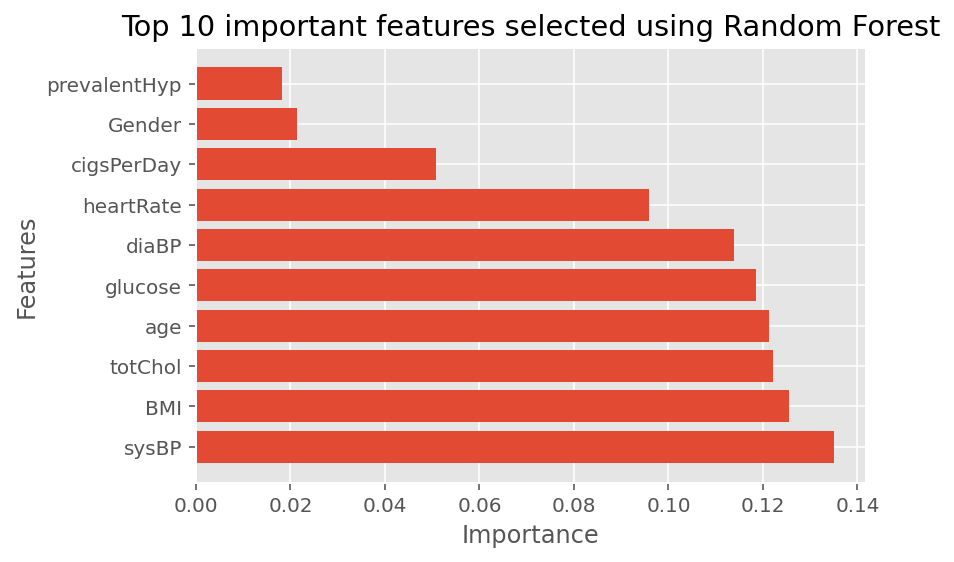

In [22]:
# Plotting top 10 features
def plot_imp(best_features, scores, method_name):   
    plt.barh(best_features, scores)
    plt.title('Top 10 important features selected using ' + method_name)
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.show()

plot_imp(best_features_rfi, feature_importances_rfi, 'Random Forest')

From the above plot, we can see that the **sysBP** feature has more importance followed by **BMI, totChol**

Defining custom class **RFIFeatureSelector()** for feature selection using RFI and to pass that as a step to the pipeline with which we search over 10 and even up to full set of features to determine the number of features that works the best with each classifier that we have chosen as part of this project.

In [23]:
# RFI feature selection function inside a pipeline
class RFIFeatureSelector(BaseEstimator, TransformerMixin):
    
    # class constructor 
    def __init__(self, n_features_=10):
        self.n_features_ = n_features_
        self.fs_indices_ = None

    # override the fit function
    def fit(self, X, y):
        from sklearn.ensemble import RandomForestClassifier
        from numpy import argsort
        model_rfc = RandomForestClassifier(n_estimators=100, random_state=999)
        model_rfc.fit(X, y)
        self.fs_indices_ = argsort(model_rfi.feature_importances_)[::-1][0:self.n_features_] 
        return self 
    
    # override the transform function
    def transform(self, X, y=None):
        return X[:, self.fs_indices_]

###### Model Evaluation using StratifiedKFold

We will train and tune our models on **3308 rows of training data** and test them on **828 rows of test data**. For each model, 5-fold stratified cross-validation is used as an evaluation method for hyper parameter tuning.

In [24]:
cv_method = StratifiedKFold(n_splits=5, shuffle=True, random_state=999)

## Random Forest Classifier <a id='rfc'></a>

A pipeline is created for tuning the hyper parameters via cross-validation after feature selection for Random Forest. Grid search for Random Forest is done by using **GridSearchCV**.

The parameters used for Random Forest are as follows:
- Minimum Samples split (min_samples_split)
- Maximum depth (max_depth)
- For RFI feature selection, number of features (n_features_)

Here, we use GridSearchCV to go over various values of max_depth and min_samples_split with 'gini' as the criterion to maximize information gain and random_state of 111.

### Model Fitting and Tuning <a id='rfc-fitting-tuning'></a>

In [25]:
# RFC Model defining for GridSearchCV
pipe_rfc = Pipeline(steps=[('rfc_fs', RFIFeatureSelector()), 
                           ('rfc', RandomForestClassifier(criterion='gini', random_state=111))])

parameters_pipe_rfc = {'rfc_fs__n_features_': [10, data_desc.shape[1]],
                      'rfc__min_samples_split': [4, 10, 20, 50, 70, 100],
                       'rfc__max_depth': [3.0, 5.0, 8.0, 10.0]}

gs_pipe_rfc = GridSearchCV(estimator=pipe_rfc, 
                           param_grid=parameters_pipe_rfc, 
                           cv=cv_method,
                           refit=True,
                           n_jobs=-2,
                           scoring='accuracy',
                           verbose=1)

In [26]:
# Model fitting
gs_pipe_rfc.fit(data_desc_train, data_target_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=999, shuffle=True),
             estimator=Pipeline(steps=[('rfc_fs', RFIFeatureSelector()),
                                       ('rfc',
                                        RandomForestClassifier(random_state=111))]),
             n_jobs=-2,
             param_grid={'rfc__max_depth': [3.0, 5.0, 8.0, 10.0],
                         'rfc__min_samples_split': [4, 10, 20, 50, 70, 100],
                         'rfc_fs__n_features_': [10, 18]},
             scoring='accuracy', verbose=1)

In [27]:
# Predicting and generating accuracy score the model
data_target_pred = gs_pipe_rfc.predict(data_desc_test)
metrics.accuracy_score(data_target_test, data_target_pred)

0.8490338164251208

In [28]:
# Confusion matrix
metrics.confusion_matrix(data_target_test, data_target_pred)

array([[697,   7],
       [118,   6]], dtype=int64)

In [29]:
# Classification report
print(metrics.classification_report(data_target_test, data_target_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       704
           1       0.46      0.05      0.09       124

    accuracy                           0.85       828
   macro avg       0.66      0.52      0.50       828
weighted avg       0.80      0.85      0.79       828



In [30]:
# Obtaining the best parameters
gs_pipe_rfc.best_params_

{'rfc__max_depth': 10.0,
 'rfc__min_samples_split': 20,
 'rfc_fs__n_features_': 18}

In [31]:
# Obtaining the best accuracy score
gs_pipe_rfc.best_score_

0.855802569575531

From the above result, we observe that the Random Forest model has a *mean accuracy score* of **0.86**. The best performing Random Forest selected *__10 features__ with **min_samples_split as 20** and __max_depth as 10.0__*.

Checking other combinations to see if the difference is rather significant or not.

In [32]:
# Function to format the scores of search results as a Pandas data frame
def get_search_results(gs):

    def model_result(scores, params):
        scores = {'mean_score': np.mean(scores),
             'std_score': np.std(scores),
             'min_score': np.min(scores),
             'max_score': np.max(scores)}
        return pd.Series({**params,**scores})

    models = []
    scores = []

    for i in range(gs.n_splits_):
        key = f"split{i}_test_score"
        r = gs.cv_results_[key]        
        scores.append(r.reshape(-1,1))

    all_scores = np.hstack(scores)
    for p, s in zip(gs.cv_results_['params'], all_scores):
        models.append((model_result(s, p)))

    results_pipe = pd.concat(models, axis=1).T.sort_values(['mean_score'], ascending=False)

    columns_headers = ['mean_score', 'std_score', 'max_score', 'min_score']
    columns = columns_headers + [c for c in results_pipe.columns if c not in columns_headers]

    return results_pipe[columns]

In [33]:
# Viewing the obtained dataset
results_rfc = get_search_results(gs_pipe_rfc)
results_rfc.head()

,mean_score,std_score,max_score,min_score,rfc__max_depth,rfc__min_samples_split,rfc_fs__n_features_
41,0.855803,0.002717,0.859517,0.851740,10.0,20.0,18.0
36,0.855198,0.004044,0.862538,0.851740,10.0,4.0,10.0
28,0.854896,0.003090,0.859517,0.850227,8.0,20.0,10.0
38,0.854291,0.002717,0.858006,0.850227,10.0,10.0,10.0
24,0.854290,0.004435,0.859517,0.847201,8.0,4.0,10.0


From above result, we can see clearly that there is not much difference between the hyper parameter combinations when number of features selected is chosen to be the condition. Hence, we can plot and visualize the results of grid search with respect to 10 features.

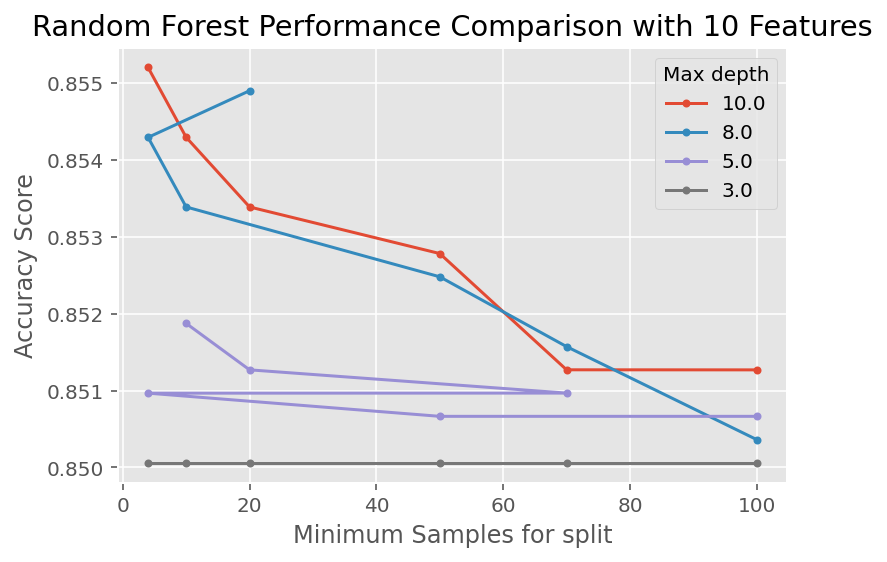

In [34]:
# Plotting results of grid search wrt 10 features
results_rfc_10f = results_rfc[results_rfc['rfc_fs__n_features_'] == 10.0]

for i in results_rfc_10f['rfc__max_depth'].unique():
    temp = results_rfc_10f[results_rfc_10f['rfc__max_depth'] == i]
    plt.plot(temp['rfc__min_samples_split'], temp['mean_score'], marker = '.', label = i)
    
plt.legend(title = "Max depth")
plt.xlabel('Minimum Samples for split')
plt.ylabel("Accuracy Score")
plt.title("Random Forest Performance Comparison with 10 Features")
plt.show()

From the above plot, we could see that accuracy score varies as max_depth and min_samples_split changes.

## Gaussian Naive Bayes <a id='gnb'></a>

Firstly, Naive Bayes requires each descriptive feature to follow a Gaussian (normal) distribution, so we perform a power transformation on the input data before model fitting using **PowerTransformer()**. Like Random Forest, a separate pipeline is created for this classifier. Grid search for Gaussian Naive Bayes is done by using **RandomizedSearchCV**.

The parameters used for Gaussian Naive Bayes are as follows:
- Smoothing value (var_smoothing)
- For RFI feature selection, number of features (n_features_)

### Model Fitting and Tuning <a id='gnb-fitting-tuning'></a>

In [35]:
# Fit transform data using PowerTransformer()
data_desc_train_transformed = PowerTransformer().fit_transform(data_desc_train)

In [36]:
# NB Model defining for RandomizedSearchCV
pipe_NB = Pipeline([('rfi_fs', RFIFeatureSelector()), 
                     ('nb', GaussianNB())])

paramaters_pipe_NB = {'rfi_fs__n_features_': [10, data_desc.shape[1]],
                      'nb__var_smoothing': np.logspace(1,-3, num=200)}

n_iter_search = 20
gs_pipe_NB = RandomizedSearchCV(estimator=pipe_NB, 
                          param_distributions=paramaters_pipe_NB, 
                          cv=cv_method,
                          refit=True,
                          n_jobs=-2,
                          scoring='accuracy',
                          n_iter=n_iter_search,
                          verbose=1)

In [37]:
# Model Fitting
gs_pipe_NB.fit(data_desc_train_transformed, data_target_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [38]:
# Predicting and generating accuracy score the model
data_target_pred_nb = gs_pipe_NB.predict(data_desc_test)
metrics.accuracy_score(data_target_test, data_target_pred_nb)

0.8502415458937198

In [39]:
# Confusion matrix
metrics.confusion_matrix(data_target_test, data_target_pred_nb)

array([[704,   0],
       [124,   0]], dtype=int64)

In [40]:
# Classification report
print(metrics.classification_report(data_target_test, data_target_pred_nb))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       704
           1       0.00      0.00      0.00       124

    accuracy                           0.85       828
   macro avg       0.43      0.50      0.46       828
weighted avg       0.72      0.85      0.78       828



In [41]:
# Obtaining the best parameters
gs_pipe_NB.best_params_

{'rfi_fs__n_features_': 10, 'nb__var_smoothing': 0.9011018251665018}

In [42]:
# Obtaining the best accuracy score
gs_pipe_NB.best_score_

0.8512694763495755

From the above result, we observe that the Naive Bayes model has a *mean accuracy score* of **0.85**. The best performing Naive Bayes selected *__10 features__ with var smoothing value __0.9__*.

In [43]:
results_NB = get_search_results(gs_pipe_NB)
results_NB.head()

,mean_score,std_score,max_score,min_score,rfi_fs__n_features_,nb__var_smoothing
18,0.851269,0.002463,0.854985,0.847432,10.0,0.901102
7,0.850966,0.003430,0.856495,0.847201,10.0,1.035322
11,0.850061,0.000568,0.850453,0.848943,10.0,7.934097
15,0.848852,0.001841,0.850453,0.845921,18.0,7.934097
8,0.848247,0.003095,0.853474,0.844411,18.0,3.292971


From above result, we can see clearly that there is not much difference between the hyper parameter combinations when number of features selected is chosen to be the condition. Hence, we can plot and visualize the results of randomized grid search with respect to 10 features.

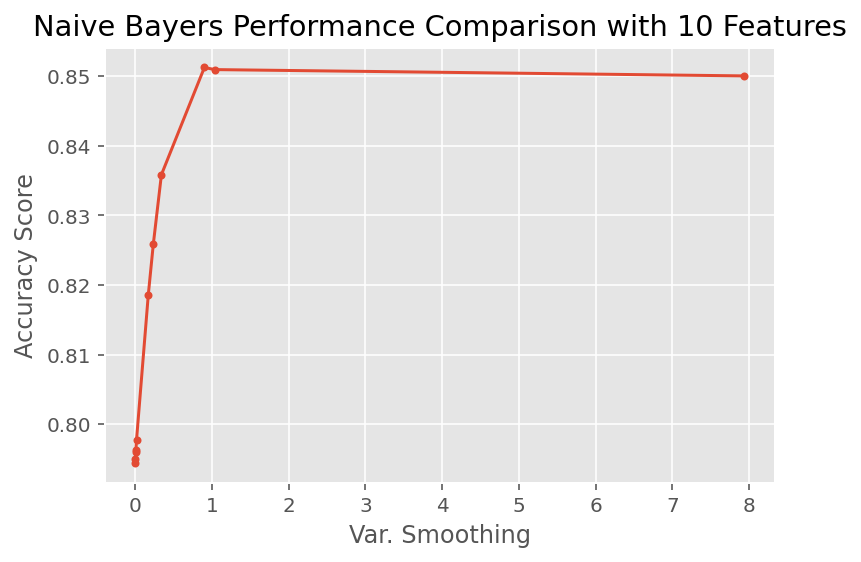

In [44]:
# Plotting results of randomized grid search wrt 10 features
results_NB_10f = results_NB[results_NB['rfi_fs__n_features_'] == 10.0].sort_values('nb__var_smoothing')

plt.plot(results_NB_10f['nb__var_smoothing'], results_NB_10f['mean_score'], marker = '.', label = i)    
plt.xlabel('Var. Smoothing')
plt.ylabel("Accuracy Score")
plt.title("Naive Bayers Performance Comparison with 10 Features")
plt.show()

From the above plot, we could see that when var_smoothing value is 0.9, we achieve a higher accuracy.

## Support Vector Machine <a id='svm'></a>

Like the earlier models, we stack feature selection and grid search for SVM hyper parameter tuning via cross-validation using a pipeline. Grid search for SVM is done by using **GridSearchCV**.

The parameters used for SVM are as follows:
- C value (C)
- Type of Kernel (kernel)
- For RFI feature selection, number of features (n_features_)

The default values for C is 1.0 and kernel is 'rbf' but here we use GridSearchCV to go over various C values and all types of kernels.

### Model Fitting and Tuning <a id='svm-fitting-tuning'></a>

In [45]:
# NB Model defining for RandomizedSearchCV
pipe_svm = Pipeline([('rfi_fs', RFIFeatureSelector()), 
                     ('svm', SVC())])

parameters_pipe_svm = {'rfi_fs__n_features_': [10, data_desc.shape[1]],
                      'svm__kernel': ['linear','poly', 'rbf', 'sigmoid', 'precomputed'],
                      'svm__C': [1.0, 2.0, 4.0, 6.0, 8.0, 10.0]}

gs_pipe_svm = GridSearchCV(estimator=pipe_svm, 
                           param_grid=parameters_pipe_svm, 
                           cv=cv_method,
                           refit=True,
                           n_jobs=-2,
                           scoring='accuracy',
                           verbose=1)

In [46]:
# Model Fitting
gs_pipe_svm.fit(data_desc_train_transformed, data_target_train);

Fitting 5 folds for each of 60 candidates, totalling 300 fits


In [47]:
# Predicting and generating accuracy score the model
data_target_pred_svm = gs_pipe_svm.predict(data_desc_test)
metrics.accuracy_score(data_target_test, data_target_pred_svm)

0.8502415458937198

In [48]:
# Confusion matrix
metrics.confusion_matrix(data_target_test, data_target_pred_svm)

array([[704,   0],
       [124,   0]], dtype=int64)

In [49]:
# Classification report
print(metrics.classification_report(data_target_test, data_target_pred_svm))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       704
           1       0.00      0.00      0.00       124

    accuracy                           0.85       828
   macro avg       0.43      0.50      0.46       828
weighted avg       0.72      0.85      0.78       828



In [50]:
# Obtaining the best parameters
gs_pipe_svm.best_params_

{'rfi_fs__n_features_': 10, 'svm__C': 1.0, 'svm__kernel': 'linear'}

In [51]:
# Obtaining the best accuracy score
gs_pipe_svm.best_score_

0.8500605600778826

From the above result, we observe that the Support Vector Machine model has a *mean accuracy score* of **0.85**. The best performing SVM selected *__10 features__ with __1.0__ as C value and kernel as __linear__*.

In [52]:
results_svm = get_search_results(gs_pipe_svm)
results_svm.head()

,mean_score,std_score,max_score,min_score,rfi_fs__n_features_,svm__C,svm__kernel
11,0.854898,0.001255,0.856278,0.853474,10,4.0,poly
6,0.854898,0.002656,0.858006,0.851964,10,2.0,poly
16,0.854596,0.001673,0.856278,0.851964,10,6.0,poly
26,0.854293,0.001111,0.856278,0.853474,10,10.0,poly
21,0.854293,0.001111,0.856278,0.853474,10,8.0,poly


From above result, we can see clearly that there is not much difference between the hyper parameter combinations when number of features selected is chosen to be the condition. Hence, we can plot and visualize the results of grid search with respect to 10 features.

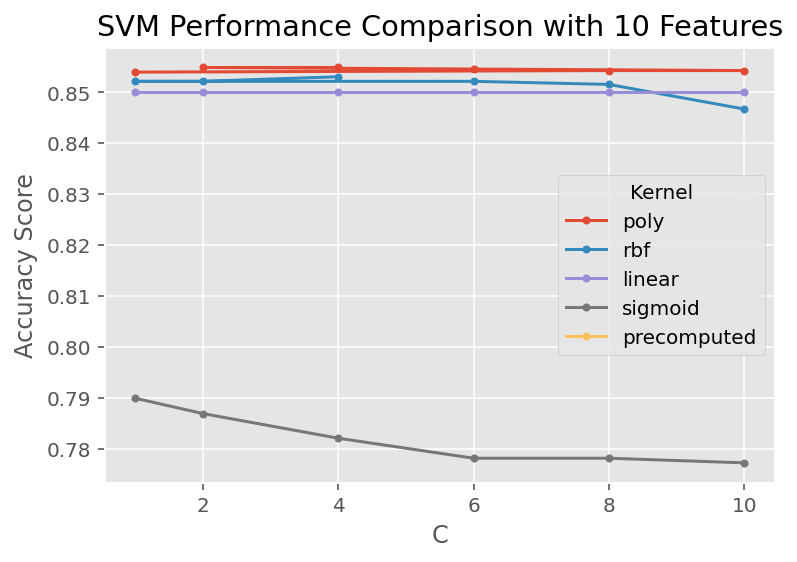

In [53]:
# Plotting results of randomized grid search wrt 10 features
results_svm_10f = results_svm[results_svm['rfi_fs__n_features_'] == 10.0]

for i in results_svm_10f['svm__kernel'].unique():
    temp = results_svm_10f[results_svm_10f['svm__kernel'] == i]
    plt.plot(temp['svm__C'], temp['mean_score'], marker = '.', label = i)
    
plt.legend(title = "Kernel")
plt.xlabel('C')
plt.ylabel("Accuracy Score")
plt.title("SVM Performance Comparison with 10 Features")
plt.show()

From the above plot, we could see that as C value increases, the accuracy score varies with respect to the type of kernel. 

## K-Nearest Neighbor Classifier <a id='knn'></a>

Same as above, we stack feature selection and grid search for KNN hyper parameter tuning via cross-validation using a pipeline. Grid search for KNN is done by using **RandomizedSearchCV**.

The parameters used for KNN are as follows:
- Number of neighbors (n_neighbors)
- p value (p)
- For RFI feature selection, number of features (n_features_)

The default value of minkowski distance (p) is 2 which is Euclidean distance and here we use RandomizedSearchCV to go over both the distance types Manhattan and Euclidean by selecting various neighbor values.

### Model Fitting and Tuning <a id='knn-fitting-tuning'></a>

In [54]:
pipe_knn = Pipeline(steps=[('rfi_fs', RFIFeatureSelector()), 
                           ('knn', KNeighborsClassifier())])

parameter_pipe_knn = {'rfi_fs__n_features_': [10, data_desc.shape[1]],
                   'knn__n_neighbors': [5, 10, 15, 20, 25, 30],
                   'knn__p': [1, 2]}

n_iter_search = 20
gs_pipe_knn = RandomizedSearchCV(estimator=pipe_knn, 
                          param_distributions=parameter_pipe_knn, 
                          cv=cv_method,
                          refit=True,
                          n_jobs=-2,
                          scoring='accuracy',
                          n_iter=n_iter_search,
                          verbose=1)

In [55]:
gs_pipe_knn.fit(data_desc_train, data_target_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [56]:
# Predicting and generating accuracy score the model
data_target_pred_knn = gs_pipe_knn.predict(data_desc_test)
metrics.accuracy_score(data_target_test, data_target_pred_knn)

0.8514492753623188

In [57]:
# Confusion matrix
metrics.confusion_matrix(data_target_test, data_target_pred_knn)

array([[701,   3],
       [120,   4]], dtype=int64)

In [58]:
# Classification report
print(metrics.classification_report(data_target_test, data_target_pred_knn))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       704
           1       0.57      0.03      0.06       124

    accuracy                           0.85       828
   macro avg       0.71      0.51      0.49       828
weighted avg       0.81      0.85      0.79       828



In [59]:
gs_pipe_knn.best_params_

{'rfi_fs__n_features_': 10, 'knn__p': 2, 'knn__n_neighbors': 10}

In [60]:
gs_pipe_knn.best_score_

0.8524793067356518

From the above result, we observe that the KNN model has a *mean accuracy score* of **0.85**. The best performing KNN selected *__10 features__ with __2__ as p value and __10__ as neighbors*.

In [61]:
results_knn = get_search_results(gs_pipe_knn)
results_knn.head()

,mean_score,std_score,max_score,min_score,rfi_fs__n_features_,knn__p,knn__n_neighbors
15,0.852479,0.003877,0.857791,0.847432,10.0,2.0,10.0
16,0.851874,0.001405,0.853474,0.850227,10.0,2.0,25.0
2,0.850967,0.000730,0.851964,0.850227,10.0,1.0,25.0
9,0.850967,0.001203,0.851964,0.848943,10.0,1.0,20.0
8,0.850664,0.002488,0.853474,0.847201,10.0,2.0,20.0


From above result, we can see clearly that there is not much difference between the hyper parameter combinations when number of features selected is chosen to be the condition. Hence, we can plot and visualize the results of grid search with respect to 10 features.

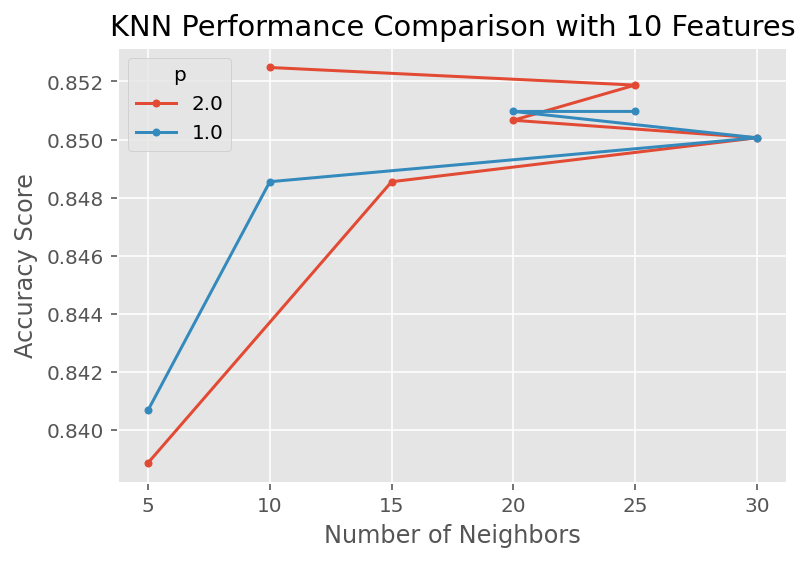

In [62]:
results_knn_10f = results_knn[results_knn['rfi_fs__n_features_'] == 10.0]

for i in results_knn_10f['knn__p'].unique():
    temp = results_knn_10f[results_knn_10f['knn__p'] == i]
    plt.plot(temp['knn__n_neighbors'], temp['mean_score'], marker = '.', label = i)
    
plt.legend(title = "p")
plt.xlabel('Number of Neighbors')
plt.ylabel("Accuracy Score")
plt.title("KNN Performance Comparison with 10 Features")
plt.show()

From the above plot, we could see that with Euclidean distance (p=2) and number of neighbors is 10, we achieve a higher accuracy.

## Decision Tree Classifier <a id='dt'></a>

Similar to other classifiers, we stack feature selection and grid search for Decision Tree hyper parameter tuning via cross-validation using a pipeline. Grid search for Decision Tree is done by using **GridSearchCV**.

The parameters used for Decision Tree are as follows:
- Minimum samples split (min_samples_split)
- Maximum depth (max_depth)
- For RFI feature selection, number of features (n_features_)

Here we use GridSearchCV to go over various values of max_depth and min_samples_split with 'gini' as the criterion to maximize information gain and random_state of 111.

### Model Fitting and Tuning <a id='dt-fitting-tuning'></a>

In [63]:
pipe_dt = Pipeline([('rfi_fs', RFIFeatureSelector()),
                    ('dt', DecisionTreeClassifier(criterion='gini', random_state=111))])

parameter_pipe_dt = {'rfi_fs__n_features_': [10, data_desc.shape[1]],
                      'dt__max_depth': [3.0, 5.0, 8.0, 10.0],
                      'dt__min_samples_split': [4, 10, 20, 50, 70, 100]}

gs_pipe_dt = GridSearchCV(estimator=pipe_dt, 
                          param_grid=parameter_pipe_dt, 
                          cv=cv_method,
                          refit=True,
                          n_jobs=-2,
                          scoring='accuracy',
                          verbose=1)

In [64]:
gs_pipe_dt.fit(data_desc_train, data_target_train);

Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [65]:
# Predicting and generating accuracy score the model
data_target_pred_dt = gs_pipe_dt.predict(data_desc_test)
metrics.accuracy_score(data_target_test, data_target_pred_dt)

0.8393719806763285

In [66]:
# Confusion matrix
metrics.confusion_matrix(data_target_test, data_target_pred_dt)

array([[692,  12],
       [121,   3]], dtype=int64)

In [67]:
# Classification report
print(metrics.classification_report(data_target_test, data_target_pred_dt))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91       704
           1       0.20      0.02      0.04       124

    accuracy                           0.84       828
   macro avg       0.53      0.50      0.48       828
weighted avg       0.75      0.84      0.78       828



In [68]:
gs_pipe_dt.best_params_

{'dt__max_depth': 3.0, 'dt__min_samples_split': 4, 'rfi_fs__n_features_': 10}

In [69]:
gs_pipe_dt.best_score_

0.8464356394915695

From the above result, we observe that the Decision Tree Classifier model has a *mean accuracy score* of **0.85**. The best performing DT selected *__10 features__ with __3.0__ as max_depth value and min_samples_split as __4__*.

In [70]:
results_dt = get_search_results(gs_pipe_dt)
results_dt.head()

,mean_score,std_score,max_score,min_score,dt__max_depth,dt__min_samples_split,rfi_fs__n_features_
0,0.846436,0.005787,0.85174,0.835347,3.0,4.0,10.0
2,0.845831,0.005809,0.85174,0.835347,3.0,10.0,10.0
1,0.845830,0.005510,0.85174,0.835347,3.0,4.0,18.0
4,0.845529,0.005608,0.85174,0.835347,3.0,20.0,10.0
5,0.845529,0.005608,0.85174,0.835347,3.0,20.0,18.0


From above result, we can see clearly that there is not much difference between the hyper parameter combinations when number of features selected is chosen to be the condition. Hence, we can plot and visualize the results of grid search with respect to 10 features.

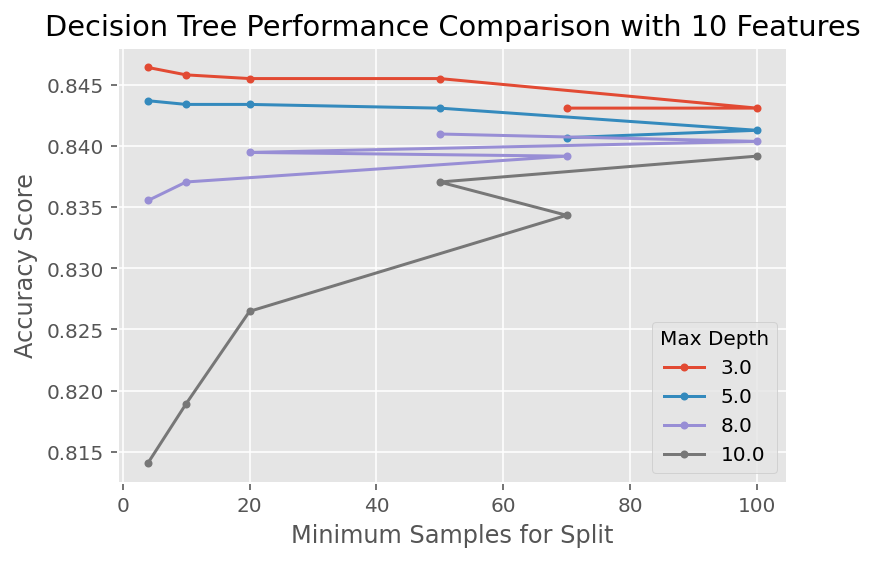

In [71]:
results_dt_10f = results_dt[results_dt['rfi_fs__n_features_'] == 10.0]
for i in results_dt_10f['dt__max_depth'].unique():
    temp = results_dt_10f[results_dt_10f['dt__max_depth'] == i]
    plt.plot(temp['dt__min_samples_split'], temp['mean_score'], marker = '.', label = i)
    
plt.legend(title = "Max Depth")
plt.xlabel('Minimum Samples for Split')
plt.ylabel("Accuracy Score")
plt.title("Decision Tree Performance Comparison with 10 Features")
plt.show()

From the above plot, we could see that accuracy score varies as max_depth and min_samples_split changes.

## Neural Network Model<a id='NN'></a>

Neural Networks are a sequence of computational models in Machine Learning that is inspired by the structure and functioning capability of human biological brain. They can be used to make classifications, identify patterns in the data and make predictions even in many non-linear data like image or speech recognition. In this analysis, we also performed neural network analysis on our data to predict our target feature **‘Heart_stroke’**. 

#### Task Modeling: 
As the first step of our neural network analysis, we installed the necessary packages such as tensorflow and keras. The cleaned dataset has been split into 80:20 ratio for the training and test datasets. In our analysis, 2 hidden layers were used to evaluate the models. The topology for the same can be explained as that the model consists of 4 layers namely Input layer which is our scaled descriptive features, output layer i.e. our target feature and 2 hidden layers. The number of neurons on the hidden layers has been kept as 3 while tuning the model.  
 
 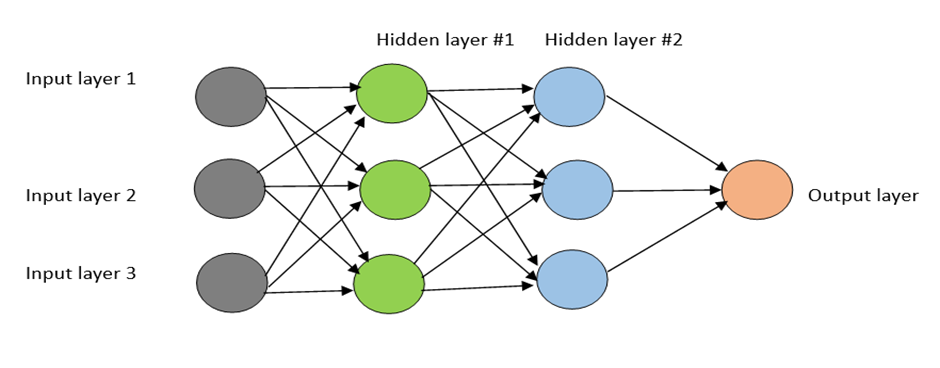
 
To activate the hidden layers, the most common linearly function, **‘relu’** has been used and since our output target feature is categorical (0 or 1), **sigmoid function** is always used for the output layer. Also to reduce the possibility of over fitting the data, we have added a drop-out layer with a rate of 0.05 after the hidden layer 1.

The number of training iterations(epochs) has been kept as **‘500’** to ensure the data is fit accurately. Also, the batch size which determines the size of the data to be fed into the model is kept as **‘300’**. As our target feature is categorical, we have used the **‘binary_crossentropy’** as the loss function which determines the loss between the true and predicted labels. For the optimization purpose, the SGD optimizer has been used with the learning rate as 0.02 and momentum as 0.9. Performance evaluations are measured by the **accuracy and roc_auc_score** metrics.

### Model and Plot Set-up
A custom function called ‘model_factory’ has been defined to perform the modeling of the data based on the parameters discussed. 
Another custom function named as ‘plot_history’ has been defined which will plot the performance of both the training data and the testing data of our NN model. 

### Model Training and Evaluation 
The model_factory function has been called based on our input parameters, which provides the test model based on the topology and this model is fitted on the training and test set based on the epochs and batch size. Using the plot_history function we visualized the model results. To evaluate the performance of the model, the result of the model prediction is set as a data frame on which the metrics like accuracy and roc_auc_score is calculated. 

### Parameter tuning
As part of parameter tuning, 5 different models have been fitted by changing the parameters related to the activation layer, training parameters and so. We have covered the details of the 5 different model tuning performed in this analysis.

##### Model 1: 
During the first tuning purpose, we reduced the batch size to ‘100’ and, we modified the hidden activation layer function to ‘tanh’.

##### Model 2:
In this model, we changed the loss function to ‘categorical_crossentropy’ to validate if it performs better than the ‘binary_crossentropy’, however we could observe that the accuracy of the test data and training data has varied a lot. 

##### Model 3
In this model, we used the **'tanh' functions and Adam** optimizer by defining the decay and its rate in the exponential decay function , which then has been passed as the learning rate for the optimizer. We could observe that the accuracy of the model had been reduced to almost 50 % than the other models.

##### Model 4 
In this model, we changed the optimizer to **'Adadelta'** with the learning rate as 0.01 and **'elu'** activation layer functions. The learning rate in the optimizer is kept as **0.001**. The accuracy trend between the test and train data remained the same across all the iterations.

##### Model 5 
In this model, we kept the same **'Adadelta'** optimizer, however we tried the **tanh** activation layer and also reduced the **batchsize** to observe the significance of it. As per the accuracy and the roc_auc_score there is no change in the performance of this model. 

### Model Fitting and Tuning <a id='NN-fitting-tuning'></a>

In [72]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, roc_auc_score
from tensorflow.keras.optimizers import SGD

In [73]:
target = data_target.copy()
target = target.values.reshape(-1, 1)

In [74]:
desc_train, desc_test, tar_train, tar_test, idx_train, idx_test = \
   train_test_split(data_desc, target, for_cols.index, test_size=0.2, random_state=999)

###### Defining a custom function for the model

In [75]:
def model_factory(input_dim, layer1_units, layer2_units):
    model = Sequential()
    model.add(Dense(layer1_units, input_dim=input_dim, activation=layer1_activation))
    model.add(Dropout(layer1_dropout_rate))
    model.add(Dense(layer2_units, activation=layer1_activation))
    model.add(Dropout(layer2_dropout_rate))
    model.add(Dense(1, activation=output_activation))
    model.compile(loss=loss, optimizer=optimizer, metrics=metrics)
    return model

###### Defining a custom function for the plot

In [76]:
def plot_nn(val): 
    plt.plot(val.history['accuracy'])
    plt.plot(val.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='lower right')
    plt.show()

#### Neural Network Model

Parameters: **hidden layer units is 3, loss='binary_crossentropy', input and output activation layers='relu' and 'sigmoid' respectively, optimizer='SGD'**

In [77]:
# size of the network is determined by the number of neural units in each hidden layer
layer1_units = 3
layer2_units = 3
loss = 'binary_crossentropy' 
# during training, we would like to monitor accuracy
metrics = ['accuracy']
epochs = 500
batch_size = 300
layer1_activation = 'relu'
layer2_activation = 'relu'
output_activation = 'sigmoid'
layer1_dropout_rate = 0.05
layer2_dropout_rate = 0.00
learning_rate=0.001
momentum=1.0

optimizer = SGD(learning_rate=learning_rate, momentum=momentum)

In [78]:
nn_model_test = model_factory(for_cols.shape[1], layer1_units, layer2_units)
nn_model_test.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 57        
                                                                 
 dropout (Dropout)           (None, 3)                 0         
                                                                 
 dense_1 (Dense)             (None, 3)                 12        
                                                                 
 dropout_1 (Dropout)         (None, 3)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 4         
                                                                 
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


In [79]:
%%time
nn_test = nn_model_test.fit(desc_train, 
                              tar_train,
                              epochs=epochs,
                              batch_size=batch_size,
                              verbose=0,
                              shuffle=True,
                              validation_data=(desc_test, tar_test))

Wall time: 27.7 s


In [80]:
# Keys in nn1 attribute of the fitted model object
nn_test.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

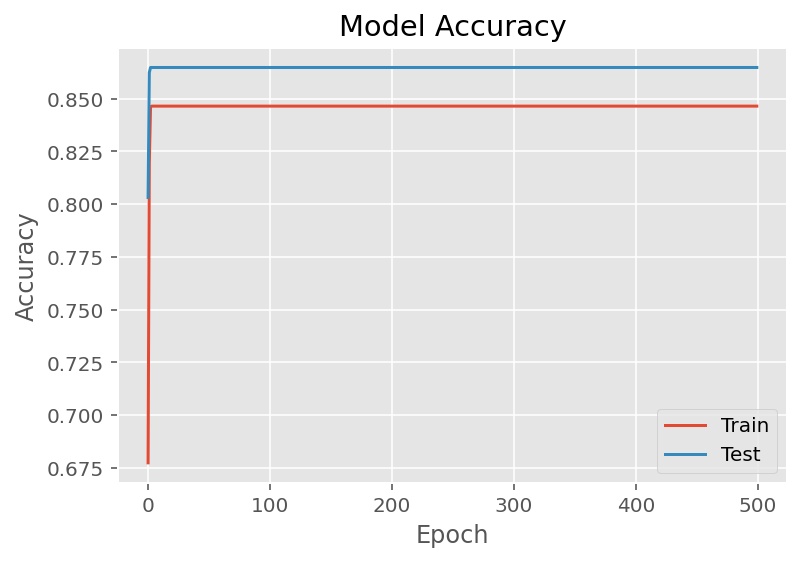

In [81]:
plot_nn(nn_test)

In [82]:
# compute prediction performance on test data
nn_model_output = nn_model_test.predict(desc_test).astype(float)

# decide classification based on threshold of 0.5
t_pred = np.where(nn_model_output < 0.5, 0, 1)

# set up the results data frame
nn_result_test = pd.DataFrame()
nn_result_test['target'] = tar_test.flatten()
nn_result_test['fit'] = t_pred
nn_result_test.head()

26/26 [==============================] - 0s 2ms/step


,target,fit
0,0,0
1,1,0
2,0,0
3,0,0
4,1,0


In [83]:
nn_accuracy = accuracy_score(nn_result_test['target'], nn_result_test['fit'])
nn_auc = roc_auc_score(nn_result_test['target'], nn_result_test['fit'])
print(f"validation data accuracy_score = {nn_accuracy:.3f}")
print(f"validation data roc_auc_score = {nn_auc:.3f}")

validation data accuracy_score = 0.865
validation data roc_auc_score = 0.500


#### Neural Network - Parameter Tuning Model 1

Tuning parameters: **hidden layer units as '3', input activation layer as 'tanh'**

In [84]:
layer1_units = 3
layer2_units = 3
loss = 'binary_crossentropy' 

metrics = ['accuracy'] 
epochs = 500
batch_size = 100
layer1_activation = 'tanh'
layer2_activation = 'tanh'
output_activation = 'sigmoid'
layer1_dropout_rate = 0.05
layer2_dropout_rate = 0.00
learning_rate=0.001
momentum=0.9

optimizer = SGD(learning_rate=learning_rate, momentum=momentum)

In [85]:
nn1_model_test = model_factory(for_cols.shape[1], layer1_units, layer2_units)
nn1_model_test.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 3)                 57        
                                                                 
 dropout_2 (Dropout)         (None, 3)                 0         
                                                                 
 dense_4 (Dense)             (None, 3)                 12        
                                                                 
 dropout_3 (Dropout)         (None, 3)                 0         
                                                                 
 dense_5 (Dense)             (None, 1)                 4         
                                                                 
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


In [86]:
%%time
nn1_test = nn1_model_test.fit(desc_train, 
                              tar_train,
                              epochs=epochs,
                              batch_size=batch_size,
                              verbose=0,
                              shuffle=True,
                              validation_data=(desc_test, tar_test))

Wall time: 45.8 s


In [87]:
# Keys in the nn1_test history attribute of the fitted model object
nn1_test.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

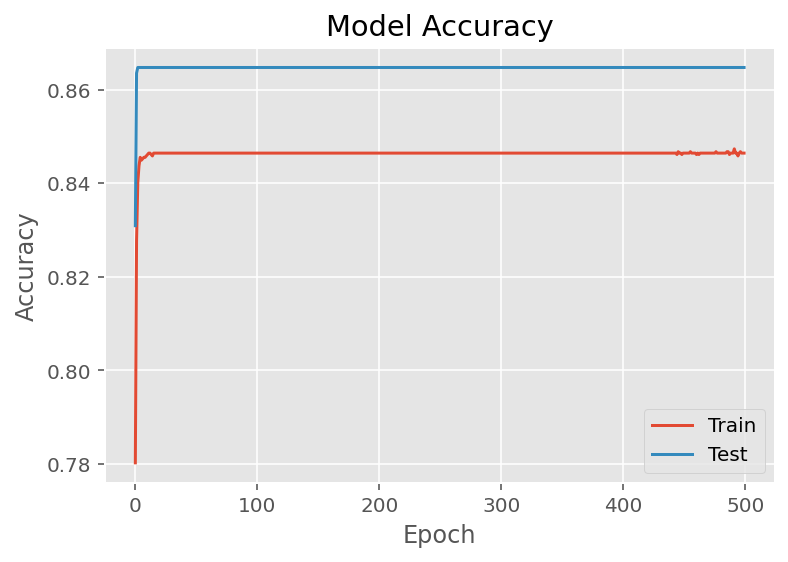

In [88]:
plot_nn(nn1_test)

In [89]:
# compute prediction performance on test data
nn1_model_output = nn1_model_test.predict(desc_test).astype(float)

# decide classification based on threshold of 0.5
t_pred = np.where(nn1_model_output < 0.5, 0, 1)

# set up the results data frame
nn1_result_test = pd.DataFrame()
nn1_result_test['target'] = tar_test.flatten()
nn1_result_test['fit'] = t_pred
nn1_result_test.head()

26/26 [==============================] - 0s 2ms/step


,target,fit
0,0,0
1,1,0
2,0,0
3,0,0
4,1,0


In [90]:
nn1_accuracy = accuracy_score(nn1_result_test['target'], nn1_result_test['fit'])
nn1_auc = roc_auc_score(nn1_result_test['target'], nn1_result_test['fit'])
print(f"validation data accuracy_score = {nn1_accuracy:.3f}")
print(f"validation data roc_auc_score = {nn1_auc:.3f}")

validation data accuracy_score = 0.865
validation data roc_auc_score = 0.500


#### Neural Network - Parameter tuning Model 2

Tuning parameters: **loss='categorical_crossentropy', input activation layer as 'relu'**

In [91]:
layer1_units = 3
layer2_units = 3
loss = 'categorical_crossentropy' 

metrics = ['accuracy'] 
epochs = 700
batch_size = 100
layer1_activation = 'relu'
layer2_activation = 'relu'
output_activation = 'sigmoid'
layer1_dropout_rate = 0.05
layer2_dropout_rate = 0.00
learning_rate=0.003
momentum=0.9

optimizer = SGD(learning_rate=learning_rate, momentum=momentum)

In [92]:
nn2_model_test = model_factory(for_cols.shape[1], layer1_units, layer2_units)
nn2_model_test.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 3)                 57        
                                                                 
 dropout_4 (Dropout)         (None, 3)                 0         
                                                                 
 dense_7 (Dense)             (None, 3)                 12        
                                                                 
 dropout_5 (Dropout)         (None, 3)                 0         
                                                                 
 dense_8 (Dense)             (None, 1)                 4         
                                                                 
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


In [93]:
%%time
nn2_test = nn2_model_test.fit(desc_train, 
                              tar_train,
                              epochs=epochs,
                              batch_size=batch_size,
                              verbose=0,
                              shuffle=True,
                              validation_data=(desc_test, tar_test))

Wall time: 1min


In [94]:
# Keys in the nn2_test attribute of the fitted model object
nn2_test.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

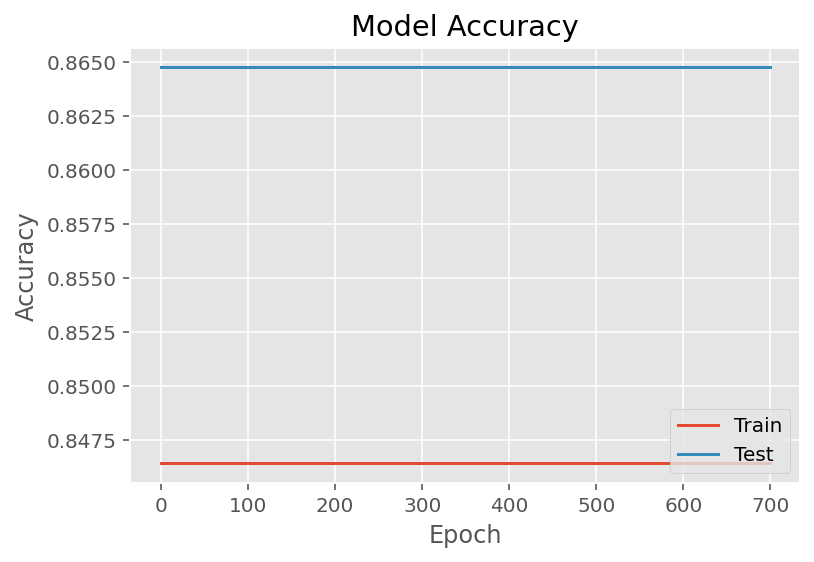

In [95]:
plot_nn(nn2_test)

In [96]:
# compute prediction performance on test data
nn2_model_output = nn2_model_test.predict(desc_test).astype(float)

# decide classification based on threshold of 0.5
t_pred = np.where(nn2_model_output < 0.5, 0, 1)

# set up the results data frame
nn2_result_test = pd.DataFrame()
nn2_result_test['target'] = tar_test.flatten()
nn2_result_test['fit'] = t_pred
nn2_result_test.head()

26/26 [==============================] - 0s 2ms/step


,target,fit
0,0,1
1,1,1
2,0,1
3,0,1
4,1,1


In [97]:
nn2_accuracy = accuracy_score(nn2_result_test['target'], nn2_result_test['fit'])
nn2_auc = roc_auc_score(nn2_result_test['target'], nn2_result_test['fit'])
print(f"validation data accuracy_score = {nn2_accuracy:.3f}")
print(f"validation data roc_auc_score = {nn2_auc:.3f}")

validation data accuracy_score = 0.135
validation data roc_auc_score = 0.500


#### Neural Network - Parameter Tuning Model 3

Tuning parameters: **optimizer as 'Adam', input activation layers as 'tanh', momentum as '0.7', learning_rate as '0.001'**

In [98]:
from tensorflow.keras.optimizers import Adam

layer1_units = 3
layer2_units = 3
loss = 'binary_crossentropy'
metrics = ['accuracy']
epochs = 500
batch_size = 100
layer1_activation = 'tanh'
layer2_activation = 'tanh'
output_activation = 'sigmoid'
layer1_dropout_rate = 0.05
layer2_dropout_rate = 0.00
learning_rate=0.001
decay=0.01
momentum=0.7

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=learning_rate,
    decay_steps=decay,
    decay_rate=momentum)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

In [99]:
nn3_model_test = model_factory(for_cols.shape[1], layer1_units, layer2_units)
nn3_model_test.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 3)                 57        
                                                                 
 dropout_6 (Dropout)         (None, 3)                 0         
                                                                 
 dense_10 (Dense)            (None, 3)                 12        
                                                                 
 dropout_7 (Dropout)         (None, 3)                 0         
                                                                 
 dense_11 (Dense)            (None, 1)                 4         
                                                                 
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


In [100]:
%%time
nn3_test = nn3_model_test.fit(desc_train, 
                              tar_train,
                              epochs=epochs,
                              batch_size=batch_size,
                              verbose=0,
                              shuffle=True,
                              validation_data=(desc_test, tar_test))

Wall time: 45.6 s


In [101]:
# Keys in the nn3_test attribute of the fitted model object
nn3_test.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

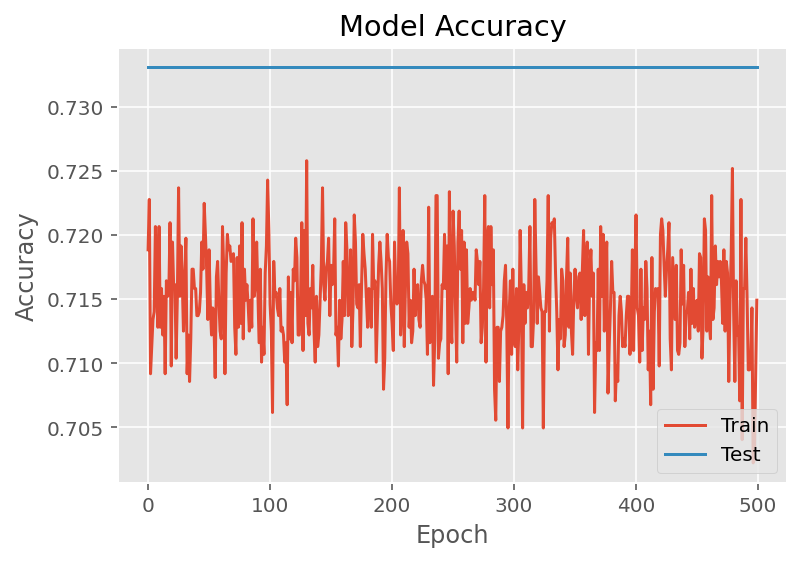

In [102]:
plot_nn(nn3_test)

In [103]:
# compute prediction performance on test data
nn3_model_output = nn3_model_test.predict(desc_test).astype(float)

# decide classification based on threshold of 0.5
t_pred = np.where(nn3_model_output < 0.5, 0, 1)

# set up the results data frame
nn3_result_test = pd.DataFrame()
nn3_result_test['target'] = tar_test.flatten()
nn3_result_test['fit'] = t_pred
nn3_result_test.head()

26/26 [==============================] - 0s 890us/step


,target,fit
0,0,0
1,1,0
2,0,0
3,0,0
4,1,0


In [104]:
nn3_accuracy = accuracy_score(nn3_result_test['target'], nn3_result_test['fit'])
nn3_auc = roc_auc_score(nn3_result_test['target'], nn3_result_test['fit'])
print(f"validation data accuracy_score = {nn3_accuracy:.3f}")
print(f"validation data roc_auc_score = {nn3_auc:.3f}")

validation data accuracy_score = 0.733
validation data roc_auc_score = 0.454


#### Neural Network - Parameter Tuning Model 4

Tuning parameters: **optimizer as 'Adadelta', loss as 'binary_crossentropy', input activation layers as 'elu'**

In [105]:
from tensorflow.keras.optimizers import Adadelta

layer1_units = 3
layer2_units = 3
loss = 'binary_crossentropy'
metrics = ['accuracy']
epochs = 500
batch_size = 100
layer1_activation = 'elu'
layer2_activation = 'elu'
output_activation = 'sigmoid'
layer1_dropout_rate = 0.05
layer2_dropout_rate = 0.00
optimizer = Adadelta(learning_rate=0.001, rho = 1.0)

In [106]:
nn4_model_test = model_factory(for_cols.shape[1], layer1_units, layer2_units)
nn4_model_test.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 3)                 57        
                                                                 
 dropout_8 (Dropout)         (None, 3)                 0         
                                                                 
 dense_13 (Dense)            (None, 3)                 12        
                                                                 
 dropout_9 (Dropout)         (None, 3)                 0         
                                                                 
 dense_14 (Dense)            (None, 1)                 4         
                                                                 
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


In [107]:
%%time
nn4_test = nn4_model_test.fit(desc_train, 
                              tar_train,
                              epochs=epochs,
                              batch_size=batch_size,
                              verbose=0,
                              shuffle=True,
                              validation_data=(desc_test, tar_test))

Wall time: 44.6 s


In [108]:
# Keys in the nn4_test attribute of the fitted model object
nn4_test.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

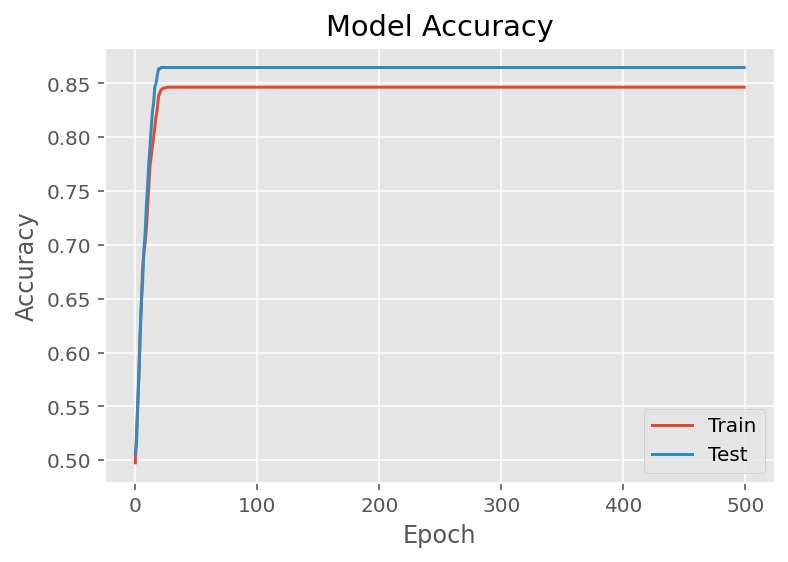

In [109]:
plot_nn(nn4_test)

In [110]:
# compute prediction performance on test data
nn4_model_output = nn4_model_test.predict(desc_test).astype(float)

# decide classification based on threshold of 0.5
t_pred = np.where(nn4_model_output < 0.5, 0, 1)

# set up the results data frame
nn4_result_test = pd.DataFrame()
nn4_result_test['target'] = tar_test.flatten()
nn4_result_test['fit'] = t_pred
nn4_result_test.head()

26/26 [==============================] - 0s 2ms/step


,target,fit
0,0,0
1,1,0
2,0,0
3,0,0
4,1,0


In [111]:
nn4_accuracy = accuracy_score(nn4_result_test['target'], nn4_result_test['fit'])
nn4_auc = roc_auc_score(nn4_result_test['target'], nn4_result_test['fit'])
print(f"validation data accuracy_score = {nn4_accuracy:.3f}")
print(f"validation data roc_auc_score = {nn4_auc:.3f}")

validation data accuracy_score = 0.865
validation data roc_auc_score = 0.500


#### Neural Network - Parameter Tuning Model 5

Tuning parameters: **optimizer as 'Adadelta', input activation layers as 'tanh', batch_size as '50'**

In [112]:
from tensorflow.keras.optimizers import Adadelta

layer1_units = 3
layer2_units = 3
loss = 'binary_crossentropy'
metrics = ['accuracy']
epochs = 500
batch_size = 50
layer1_activation = 'tanh'
layer2_activation = 'tanh'
output_activation = 'sigmoid'
layer1_dropout_rate = 0.05
layer2_dropout_rate = 0.00

optimizer = Adadelta(learning_rate=0.001, rho = 1.0)

In [113]:
nn5_model_test = model_factory(for_cols.shape[1], layer1_units, layer2_units)
nn5_model_test.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 3)                 57        
                                                                 
 dropout_10 (Dropout)        (None, 3)                 0         
                                                                 
 dense_16 (Dense)            (None, 3)                 12        
                                                                 
 dropout_11 (Dropout)        (None, 3)                 0         
                                                                 
 dense_17 (Dense)            (None, 1)                 4         
                                                                 
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


In [114]:
%%time
nn5_test = nn5_model_test.fit(desc_train, 
                              tar_train,
                              epochs=epochs,
                              batch_size=batch_size,
                              verbose=0,
                              shuffle=True,
                              validation_data=(desc_test, tar_test))

Wall time: 1min 9s


In [115]:
# Keys in the nn5_test attribute of the fitted model object
nn5_test.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

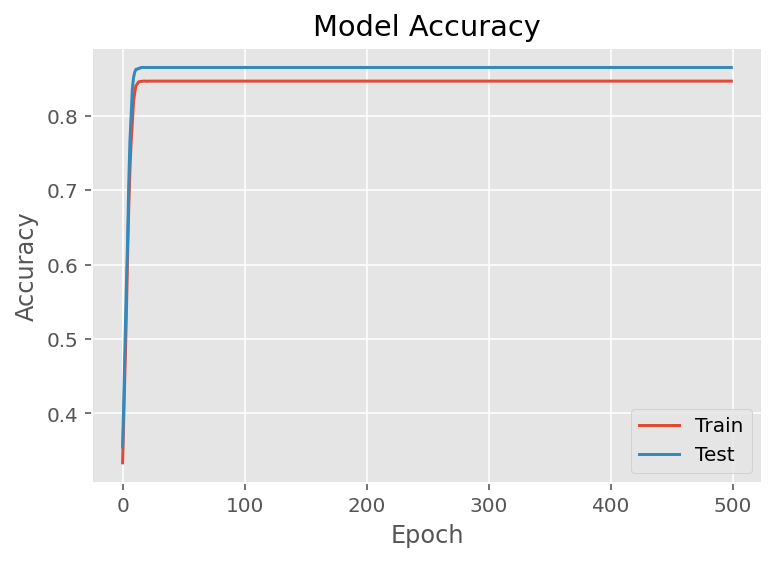

In [116]:
plot_nn(nn5_test)

In [117]:
# compute prediction performance on test data
nn5_model_output = nn5_model_test.predict(desc_test).astype(float)

# decide classification based on threshold of 0.5
t_pred = np.where(nn5_model_output < 0.5, 0, 1)

# set up the results data frame
nn5_result_test = pd.DataFrame()
nn5_result_test['target'] = tar_test.flatten()
nn5_result_test['fit'] = t_pred
nn5_result_test.head()

26/26 [==============================] - 0s 2ms/step


,target,fit
0,0,0
1,1,0
2,0,0
3,0,0
4,1,0


In [118]:
nn5_accuracy = accuracy_score(nn5_result_test['target'], nn5_result_test['fit'])
nn5_auc = roc_auc_score(nn5_result_test['target'], nn5_result_test['fit'])
print(f"validation data accuracy_score = {nn5_accuracy:.3f}")
print(f"validation data roc_auc_score = {nn5_auc:.3f}")

validation data accuracy_score = 0.865
validation data roc_auc_score = 0.500


## Model Comparison <a id='model-comparison'></a>

We used the 3308 rows of our training data within a cross-validation framework during the hyper-parameter tuning phase and found the best hyper-parameter values for each of the classifiers which are listed below.
- Random Forest selected 10 features with min_samples_split as 20 and max_depth as 10.0.
- Naive Bayes selected 10 features with var smoothing value 0.9.
- SVM selected 10 features with 1.0 as C value and kernel as linear.
- KNN selected 10 features with 2 as p value and 10 as neighbors.
- Decision Tree selected 10 features with 3.0 as max_depth value and min_samples_split as 4.

We now fit each tuned classifier with the best set of hyper-parameter values on the 828 rows of the test data in a cross-validated fashion and suggest which classifier performs the best for our problem.

we first perform **StratifiedKFold with 10 splits** without any repetitions on each classifiers and use the same seed in all the cross-validation runs and also perform **Paired t-test** in terms of **AUC (Area Under Curve)** to determine if any difference between the performance of any two classifiers is statistically significant. We would perform t-tests for the below pairs.
- Random Forest vs Naive Bayes
- Random Forest vs SVM
- Random Forest vs KNN
- Random Forest vs Decision Tree
- Naive Bayes vs SVM
- Naive Bayes vs KNN
- Naive Bayes vs Decision Tree
- SVM vs KNN
- SVM vs Decision Tree
- KNN vs Decision Tree

###### Cross Validation Score

In [119]:
from sklearn.model_selection import cross_val_score
cv_method_ttest = StratifiedKFold(n_splits=10, shuffle=True, random_state=111)

In [120]:
cv_results_rfc = cross_val_score(estimator=gs_pipe_rfc.best_estimator_,
                                X=data_desc_test,
                                y=data_target_test, 
                                cv=cv_method_ttest, 
                                n_jobs=-2,
                                scoring='roc_auc')
cv_results_rfc.mean()

0.6827779497497808

In [121]:
data_desc_test_transformed = PowerTransformer().fit_transform(data_desc_test)

cv_results_NB = cross_val_score(estimator=gs_pipe_NB.best_estimator_,
                                X=data_desc_test_transformed,
                                y=data_target_test, 
                                cv=cv_method_ttest, 
                                n_jobs=-2,
                                scoring='roc_auc')
cv_results_NB.mean()

0.6832337615436207

In [122]:
cv_results_svm = cross_val_score(estimator=gs_pipe_svm.best_estimator_,
                                 X=data_desc_test,
                                 y=data_target_test, 
                                 cv=cv_method_ttest, 
                                 n_jobs=-2,
                                 scoring='roc_auc')
cv_results_svm.mean()

0.5529359490274984

In [123]:
cv_results_knn = cross_val_score(estimator=gs_pipe_knn.best_estimator_,
                                 X=data_desc_test,
                                 y=data_target_test, 
                                 cv=cv_method_ttest,
                                 n_jobs=-2,
                                 scoring='roc_auc')
cv_results_knn.mean()

0.6657168008048291

In [124]:
cv_results_dt = cross_val_score(estimator=gs_pipe_dt.best_estimator_,
                                X=data_desc_test,
                                y=data_target_test, 
                                cv=cv_method_ttest, 
                                n_jobs=-2,
                                scoring='roc_auc')
cv_results_dt.mean()

0.6423639271526596

###### Paired t-test

In [125]:
from scipy import stats
print(stats.ttest_rel(cv_results_rfc, cv_results_NB))
print(stats.ttest_rel(cv_results_rfc, cv_results_svm))
print(stats.ttest_rel(cv_results_rfc, cv_results_knn))
print(stats.ttest_rel(cv_results_rfc, cv_results_dt))
print(stats.ttest_rel(cv_results_NB, cv_results_svm))
print(stats.ttest_rel(cv_results_NB, cv_results_knn))
print(stats.ttest_rel(cv_results_NB, cv_results_dt))
print(stats.ttest_rel(cv_results_svm, cv_results_knn))
print(stats.ttest_rel(cv_results_svm, cv_results_dt))
print(stats.ttest_rel(cv_results_knn, cv_results_dt))

TtestResult(statistic=-0.04777272647204846, pvalue=0.9629406909351914, df=9)
TtestResult(statistic=3.015615156076512, pvalue=0.014582547726066944, df=9)
TtestResult(statistic=0.6485585526643459, pvalue=0.5328206655367269, df=9)
TtestResult(statistic=1.9273169593840058, pvalue=0.08604177025576726, df=9)
TtestResult(statistic=2.985312974853828, pvalue=0.015316951601139195, df=9)
TtestResult(statistic=0.6393208926086447, pvalue=0.5385440341511305, df=9)
TtestResult(statistic=1.8784958948851422, pvalue=0.0930293395296218, df=9)
TtestResult(statistic=-4.15046828504616, pvalue=0.002482652947065516, df=9)
TtestResult(statistic=-2.8326501653063776, pvalue=0.019637284006260657, df=9)
TtestResult(statistic=1.0389001618129168, pvalue=0.325955694902426, df=9)


We know that, when a **p-value is smaller than 0.05,at 95% significance level it indicates the model is statistically significant**. From the above results, we can observe that the difference between *__RFC/SVM, NB/SVM, SVM/KNN and SVM/DT__* pairs are statistically significant as the p-values are smaller than 0.05 at 95% significance level for the pairs of the models listed. Hence, we conclude that, *__at a 95% significance level, SVM is statistically the best model in terms of AUC__* when compared on the test data in this scenario (though this is subjected to change upon subsequent runs).

## Critique & Limitations <a id='limitations'></a>

The quality and representativeness of the dataset has a significant impact on the model's performance. The dataset's bias, incompleteness or lack of key properties could result in unreliable predictions and restrict the models' capacity to be generalized.  For feature selection, the method used is Random Forest Importance. The true underlying correlations between features and the target variable may not always be captured by this technique, despite the fact that it can offer insights into feature relevance. To validate the choice, alternative feature selection techniques like F1-classification or Mutual Information could be performed. Using grid search or randomized search, the hyper parameters of the classifiers and neural networks were adjusted. Even while this aids in discovering better hyper parameter configurations, it is still possible to overlook the ideal parameter pairings. Using a Paired T-test, the research compared the models based on AUC. Even while this sheds some light on how the models compare, it's vital to also take other evaluation metrics into account. We have also used cross-validation to assess the models.

**Strengths:** The project adopted a systematic methodology that included feature selection, model training, and evaluation. This methodical approach guarantees a thorough study and aids in addressing different facets of the issue. The project offers a comparison of various predictive modeling techniques by testing five different classifiers and neural networks. This makes it possible to choose the model that best addresses the situation at hand by providing a deeper knowledge of the benefits and drawbacks of each model. In order to improve the performance of the models, the project used hyper parameter tuning. This procedure aids in optimizing the models' configurations and improving their predictive power.

**Weakness:** The selection of features, interpretation of the model, and detection of potential biases or restrictions in the dataset can all be considerably aided by domain expertise. The dataset's source, manner of collection, and potential biases were not fully disclosed by the study. Drawing relevant inferences and evaluating the model's dependability require an understanding of the dataset's properties and constraints. While the study used a variety of indicators to assess the models, it did not go into detail to examine errors or incorrect classifications. Investigating the different model faults and their possible effects could offer insightful information for future development. The project was aware that the results might not apply to different datasets. This drawback emphasizes the need for additional study and dataset validation to make sure the models are reliable and useful in real-world situations.

Overall, there are certain restrictions to take into account, such as dataset constraints, feature selection strategies, even if our research follows a methodological approach and investigates different models. The dependability and generalizability of the models can be improved by addressing these constraints and incorporating domain expertise.

## Summary & Conclusions <a id='Summary-and-Conclusion'></a>

### Project Summary <a id='project-summary'></a>

The project aimed to predict the probability of an individual being affected by a heart stroke using a dataset on heart disease. The dataset contained **16 features** and **4238 observations**. In Phase 1, data preprocessing was performed, including type conversions and imputation of missing values. Exploratory data analysis was conducted to understand the correlation between features. In Phase 2, we have converted the categorical variables with two values into 0 or 1 using **one hot encoding** and after that we have scaled the data using **MinMaxScaler()**. Feature selection was performed using **Random Forest Importance** and we got top **10 features** to be used for our modelling. We have used five classification models **(Random Forest, Gaussian Naive Bayes, Support Vector Machine, K-Nearest Neighbor, and Decision Tree)** for predictive modeling.  We have used **pipeline method**  and **hyper parameter tuning** was conducted for each classifier using **grid search** or **randomized search** before fitting the trained dataset to the model. The models were evaluated using **accuracy, area under the curve (AUC)**, and other metrics derived from the **confusion matrix** to determine the performance of each model. Neural network analysis has been performed and five different hyper tuned models were evaluated based on their **accuracy score** and **ROC**. Finally to compare each classification models we have performed **StratifiedKFold cross-validation** with 10 folds and runs with same seed and performed **Paired T-test** in terms of **AUC (Area Under Curve)** for each pair of tuned classifiers to determine the classifiers that have **p value smaller than 0.05** which indicates the model is **statistically significant** and can be used to predict our problem.

### Summary of Findings <a id='summary-findings'></a>

**Random Forest:** **0.86 mean accuracy score** have been achieved for **10 selected features** with **min_samples_samples** as **20** and max depth as **10.0**. It is found that **accuracy score varies** as max_depth and min_samples_split changes when explored with different hyper parameter combinations.

**Gaussian Naive Bayes:** **0.85 mean accuracy score** have been achieved for **10 selected features** with **var smoothing value is 0.9**. It is found that we achieve **higher accuracy** when var smoothing value is 0.9.

**Support Vector Machine:** **0.85 mean accuracy score** have been achieved for **10 selected features** with **C value** as **1** and **kernel** as **linear**. It is found that the **accuracy score varies** with respect to the type of kernel while C value increases.

**K-Nearest Neighbor:** **0.85 mean accuracy score** have been achieved for **10 selected features** with **p value** as **2** and **10 neighbors**. It is found that we can achieve **higher accuracy** when p value is 2.0 and number of neighbors is 10.

**Decision Tree:** **0.85 mean accuracy score** have been achieved for **10 selected features** with **min_samples_samples** as **4** and **max_depth value** as **3.0**. It is found that the **accuracy score varies** when max_depth and min_samples_split changes.


**Neural Networks:**

**Model:** The model have been designed with tuning parameters as **hidden layer units** as **3**, **loss='binary_crossentropy'**, **input and output activation layers='relu'** and **'sigmoid'** respectively, **optimizer='SGD'**. We have achieved **0.865 accuracy score** and **0.500 ROC score**.

**Hyper Parameter Tuned Model 1:** The model have been designed with tuning parameters as **hidden layer units** as **3**, **loss='binary_crossentropy'**, **input and output activation layers='tanh'** and **'sigmoid'** respectively, **optimizer='SGD’**. We have achieved **0.865 accuracy score** and **0.500 ROC score**.

**Hyper Parameter Tuned Model 2:** The model have been designed with tuning parameters as **hidden layer units** as **'3'**, **loss** as **'categorical_crossentropy'**, **input and output activation layers='relu'** and **'sigmoid'** respectively. We have achieved **0.135 accuracy score** and **0.500 ROC score**.

**Hyper Parameter Tuned Model 3:** The model have been designed with tuning parameters as **loss='binary_crossentropy'**, **input and output activation layers** as **'tanh'**, **'sigmoid'** respectively, **optimizer is 'Adam'**. We have achieved **0.733 accuracy score** and **0.454 ROC score**.

**Hyper Parameter Tuned Model 4:** The model have been designed with tuning parameters for **input and output activation layers='elu'** and **'sigmoid'** respectively, **optimizer** as **'Adadelta'**. We have achieved **0.865 accuracy score** and **0.500 ROC score**.

**Hyper Parameter Tuned Model 5:** The model have been designed with tuning parameters as **optimizer** as **'Adadelta'**, **loss** as **'binary_crossentropy'**, **input activation layers** as **'tanh'**. We have achieved **0.865 accuracy score** and **0.500 ROC score**.


**Model Comparison:** 

We have performed **StratifiedKFold** with 10 splits without any repetition on each classifiers with same seed in all cross-validation runs and performed **Paired t-test** in terms of **AUC(Area Under Curve)** and found **RFC/SVM, NB/SVM, SVM/KNN** and **SVM/DT** pairs are **statistically significant** as the **p-values** are smaller than **0.05**.

### Conclusions <a id='conclusions'></a>

For the given dataset, our goal of predicting the heart stroke has been achieved using five different classifiers and based on the evaluation results using **Paired t-test** in terms of **AUC(Area Under Curve)**, we could say that **Support Vector Machine** is **more statistically significant** when compared to other other classifiers as it has the **p value** smaller than **0.05** and the other classifiers have p values greater than 0.05 which is statistically not significant. It is important to note that these findings are specific to the given dataset and may not generalize to other datasets. Further research and validations are recommended to confirm the performance of the selected models.

## References <a id='References'></a>

- Mirza_Hasnine. (2023, March 11). Heart disease dataset. Kaggle. Retrieved April 5, 2023, from https://www.kaggle.com/datasets/mirzahasnine/heart-disease-dataset
- Case study: Predicting income status. www.featureranking.com. (2022a, February 27). https://www.featureranking.com/tutorials/machine-learning-tutorials/case-study-predicting-income-status/ 
- SK part 7: Neural networks: A simple case study. (2022). Retrieved from https://www.featureranking.com/tutorials/machine-learning-tutorials/sk-part-7-neural-networks-simple-case-study/